# Mobile Price Prediction Using Machine Learning

## Importing All The Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
warnings.filterwarnings("ignore")

## Data Cleaning

In [2]:
data = pd.read_csv("final.csv")
data.head()

,price,rating,sim_count,fast_charge,card,card_size,display_inches,displaypx_w,displaypx_h,refresh_rate,...,rear_cam_1,rear_cam_2,rear_cam_3,3g,4g,5g,rom,ram,battery,os
0,182999,78.0,2,NaN,0.0,0,6.7,1290.0,2796.0,120.0,...,48.0,12,12,1.0,1.0,1.0,1.0,6.0,4323.0,1
1,179900,86.0,2,NaN,0.0,0,6.7,1284.0,2778.0,120.0,...,12.0,12,12,1.0,1.0,1.0,1.0,6.0,4352.0,1
2,172999,77.0,2,NaN,0.0,0,6.1,1179.0,2556.0,120.0,...,48.0,12,12,1.0,1.0,1.0,1.0,6.0,3200.0,1
3,169900,78.0,2,NaN,0.0,0,6.7,1290.0,2796.0,120.0,...,48.0,12,12,1.0,1.0,1.0,512.0,6.0,4323.0,1
4,169000,NaN,2,55.0,NaN,0,8.0,2200.0,2480.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,512.0,8.0,4500.0,0


In [3]:
data.describe()

,price,rating,sim_count,fast_charge,card,card_size,display_inches,displaypx_w,displaypx_h,refresh_rate,...,front_cam_1,front_cam_2,rear_cam_1,3g,4g,5g,rom,ram,battery,os
count,1015.000000,876.000000,1015.000000,766.000000,736.000000,1015.000000,982.000000,982.000000,982.000000,610.000000,...,939.000000,19.000000,953.000000,995.0,994.0,547.0,995.000000,1008.000000,982.000000,1015.000000
mean,29767.708374,78.262557,1.978325,46.136684,0.851902,356.059113,6.469786,1059.559063,2178.586558,111.624590,...,16.548562,10.631579,49.964323,1.0,1.0,1.0,134.855276,21.099702,4760.328921,0.046305
std,29309.999090,7.387218,0.152310,34.327713,0.355438,438.918498,0.652008,308.276138,574.056686,18.542944,...,10.949822,7.889589,33.562025,0.0,0.0,0.0,87.895294,131.023596,1099.937903,0.210249
min,99.000000,60.000000,0.000000,10.000000,0.000000,0.000000,1.770000,120.000000,160.000000,90.000000,...,0.300000,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,800.000000,0.000000
25%,12377.000000,74.000000,2.000000,18.000000,1.000000,0.000000,6.500000,1080.000000,1612.000000,90.000000,...,8.000000,8.000000,16.000000,1.0,1.0,1.0,64.000000,4.000000,4500.000000,0.000000
50%,19499.000000,80.000000,2.000000,33.000000,1.000000,16.000000,6.580000,1080.000000,2400.000000,120.000000,...,16.000000,8.000000,50.000000,1.0,1.0,1.0,128.000000,6.000000,5000.000000,0.000000
75%,34990.000000,84.000000,2.000000,66.000000,1.000000,1000.000000,6.670000,1080.000000,2408.000000,120.000000,...,16.000000,8.000000,64.000000,1.0,1.0,1.0,128.000000,8.000000,5000.000000,0.000000
max,182999.000000,89.000000,2.000000,240.000000,1.000000,2000.000000,8.030000,2460.000000,3840.000000,240.000000,...,60.000000,32.000000,200.000000,1.0,1.0,1.0,640.000000,1800.000000,22000.000000,1.000000


In [4]:
# number of null values in each column
data.isna().sum()

price               0
rating            139
sim_count           0
fast_charge       249
card              279
card_size           0
display_inches     33
displaypx_w        33
displaypx_h        33
refresh_rate      405
core               61
clock_speed        76
front_cam_1        76
front_cam_2       996
rear_cam_1         62
rear_cam_2        316
rear_cam_3        507
3g                 20
4g                 21
5g                468
rom                20
ram                 7
battery            33
os                  0
dtype: int64

In [5]:
data.drop(["fast_charge","card","card_size","refresh_rate","displaypx_h","displaypx_w","rear_cam_2","rear_cam_3",'front_cam_2',"rating"],axis=1,inplace=True)

In [6]:
data.loc[data.rom.isna()]

,price,sim_count,display_inches,core,clock_speed,front_cam_1,rear_cam_1,3g,4g,5g,rom,ram,battery,os
161,49990,2,NaN,6.0,3.22,NaN,NaN,1.0,1.0,1.0,NaN,64.0,NaN,1
187,43900,2,NaN,6.0,3.22,NaN,NaN,1.0,1.0,1.0,NaN,64.0,NaN,1
783,11999,1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1470.0,NaN,0
974,4799,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
977,4649,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
980,3999,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1200.0,NaN,0
983,3749,2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0
986,3399,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,0
991,2799,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,NaN,0
992,2499,2,2.4,NaN,NaN,NaN,0.3,NaN,NaN,NaN,NaN,4.0,1020.0,0


In [7]:
# we can drop these rows where rom is null because most of the other attributes in these rows are also null
data.drop(data.loc[data.rom.isna()].index,axis=0,inplace=True)

In [8]:
data.sim_count.value_counts(dropna=False)

sim_count
2    977
1     17
0      1
Name: count, dtype: int64

In [9]:
# filling null values with mean values where number of null values is very low
data.display_inches.fillna(data.display_inches.mean(),inplace=True)
data.clock_speed.fillna(data.clock_speed.mean(),inplace=True)
data.core.fillna(data.core.mean(),inplace=True)
data.battery.fillna(data.battery.mean(),inplace=True)

# we can fill the null values in 4g and 5g columns with zero assuming its a 3g phone and we can drop the 3g column
data["4g"].fillna(0,inplace=True)
data["5g"].fillna(0,inplace=True)
data.drop(["3g"],axis=1,inplace=True)

In [10]:
data.loc[data["front_cam_1"].isna()]

,price,sim_count,display_inches,core,clock_speed,front_cam_1,rear_cam_1,4g,5g,rom,ram,battery,os
4,169000,2,8.000000,8.000000,2.860000,NaN,NaN,1.0,1.0,512.0,8.0,4500.000000,0
5,163980,2,7.600000,8.000000,3.200000,NaN,NaN,1.0,1.0,1.0,12.0,4400.000000,0
6,162990,2,7.800000,8.000000,2.840000,NaN,NaN,1.0,0.0,512.0,8.0,4600.000000,0
7,154998,2,7.600000,8.000000,3.200000,NaN,NaN,1.0,1.0,256.0,12.0,4400.000000,0
8,149999,2,7.200000,8.000000,2.840000,NaN,NaN,1.0,1.0,128.0,8.0,3360.000000,0
13,139900,2,6.473935,6.000000,3.100000,NaN,NaN,1.0,1.0,512.0,6.0,4764.141692,1
16,134999,1,7.400000,8.000000,2.840000,NaN,NaN,1.0,0.0,256.0,8.0,4000.000000,0
17,130990,2,6.473935,7.771008,2.441377,NaN,NaN,1.0,1.0,128.0,8.0,4764.141692,1
25,119990,2,8.030000,8.000000,3.200000,NaN,NaN,1.0,1.0,256.0,12.0,4800.000000,0
27,119900,2,6.473935,6.000000,3.100000,NaN,NaN,1.0,1.0,256.0,6.0,4764.141692,1


In [11]:
# from the above cell we can see that rows which has null for front camera also have null for rear camera ,
# so we can drop those rows because they are invalid data
data.drop(data.loc[data["front_cam_1"].isna()].index,axis=0,inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939 entries, 0 to 996
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           939 non-null    int64  
 1   sim_count       939 non-null    int64  
 2   display_inches  939 non-null    float64
 3   core            939 non-null    float64
 4   clock_speed     939 non-null    float64
 5   front_cam_1     939 non-null    float64
 6   rear_cam_1      939 non-null    float64
 7   4g              939 non-null    float64
 8   5g              939 non-null    float64
 9   rom             939 non-null    float64
 10  ram             939 non-null    float64
 11  battery         939 non-null    float64
 12  os              939 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 102.7 KB


In [13]:
data.isna().sum()

price             0
sim_count         0
display_inches    0
core              0
clock_speed       0
front_cam_1       0
rear_cam_1        0
4g                0
5g                0
rom               0
ram               0
battery           0
os                0
dtype: int64

## Exploratory Data Analysis

<Axes: >

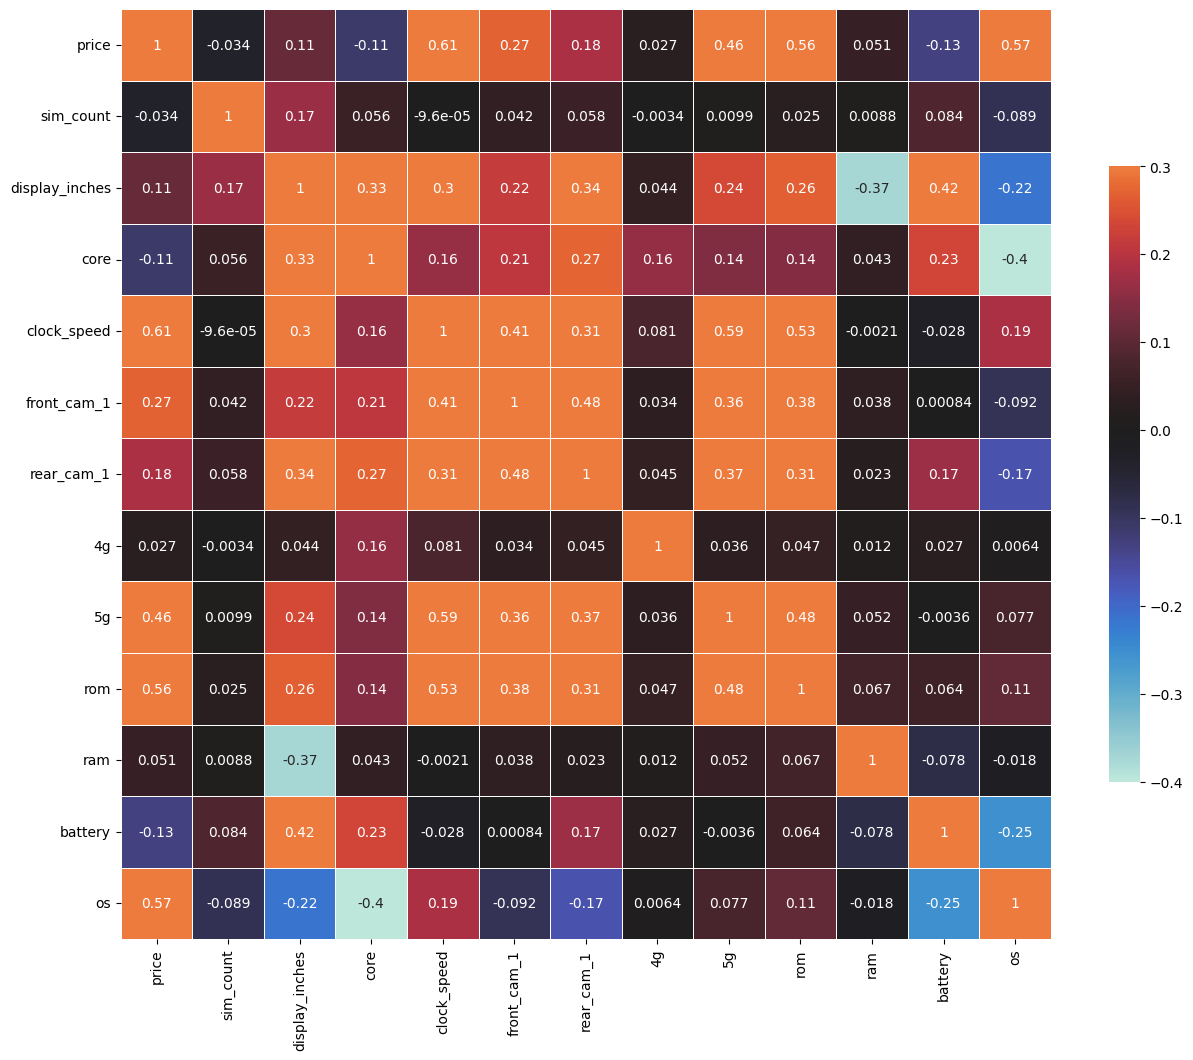

In [14]:
# heatmap of the correlation between variables
plt.figure(figsize=(15, 16))
corr = data.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

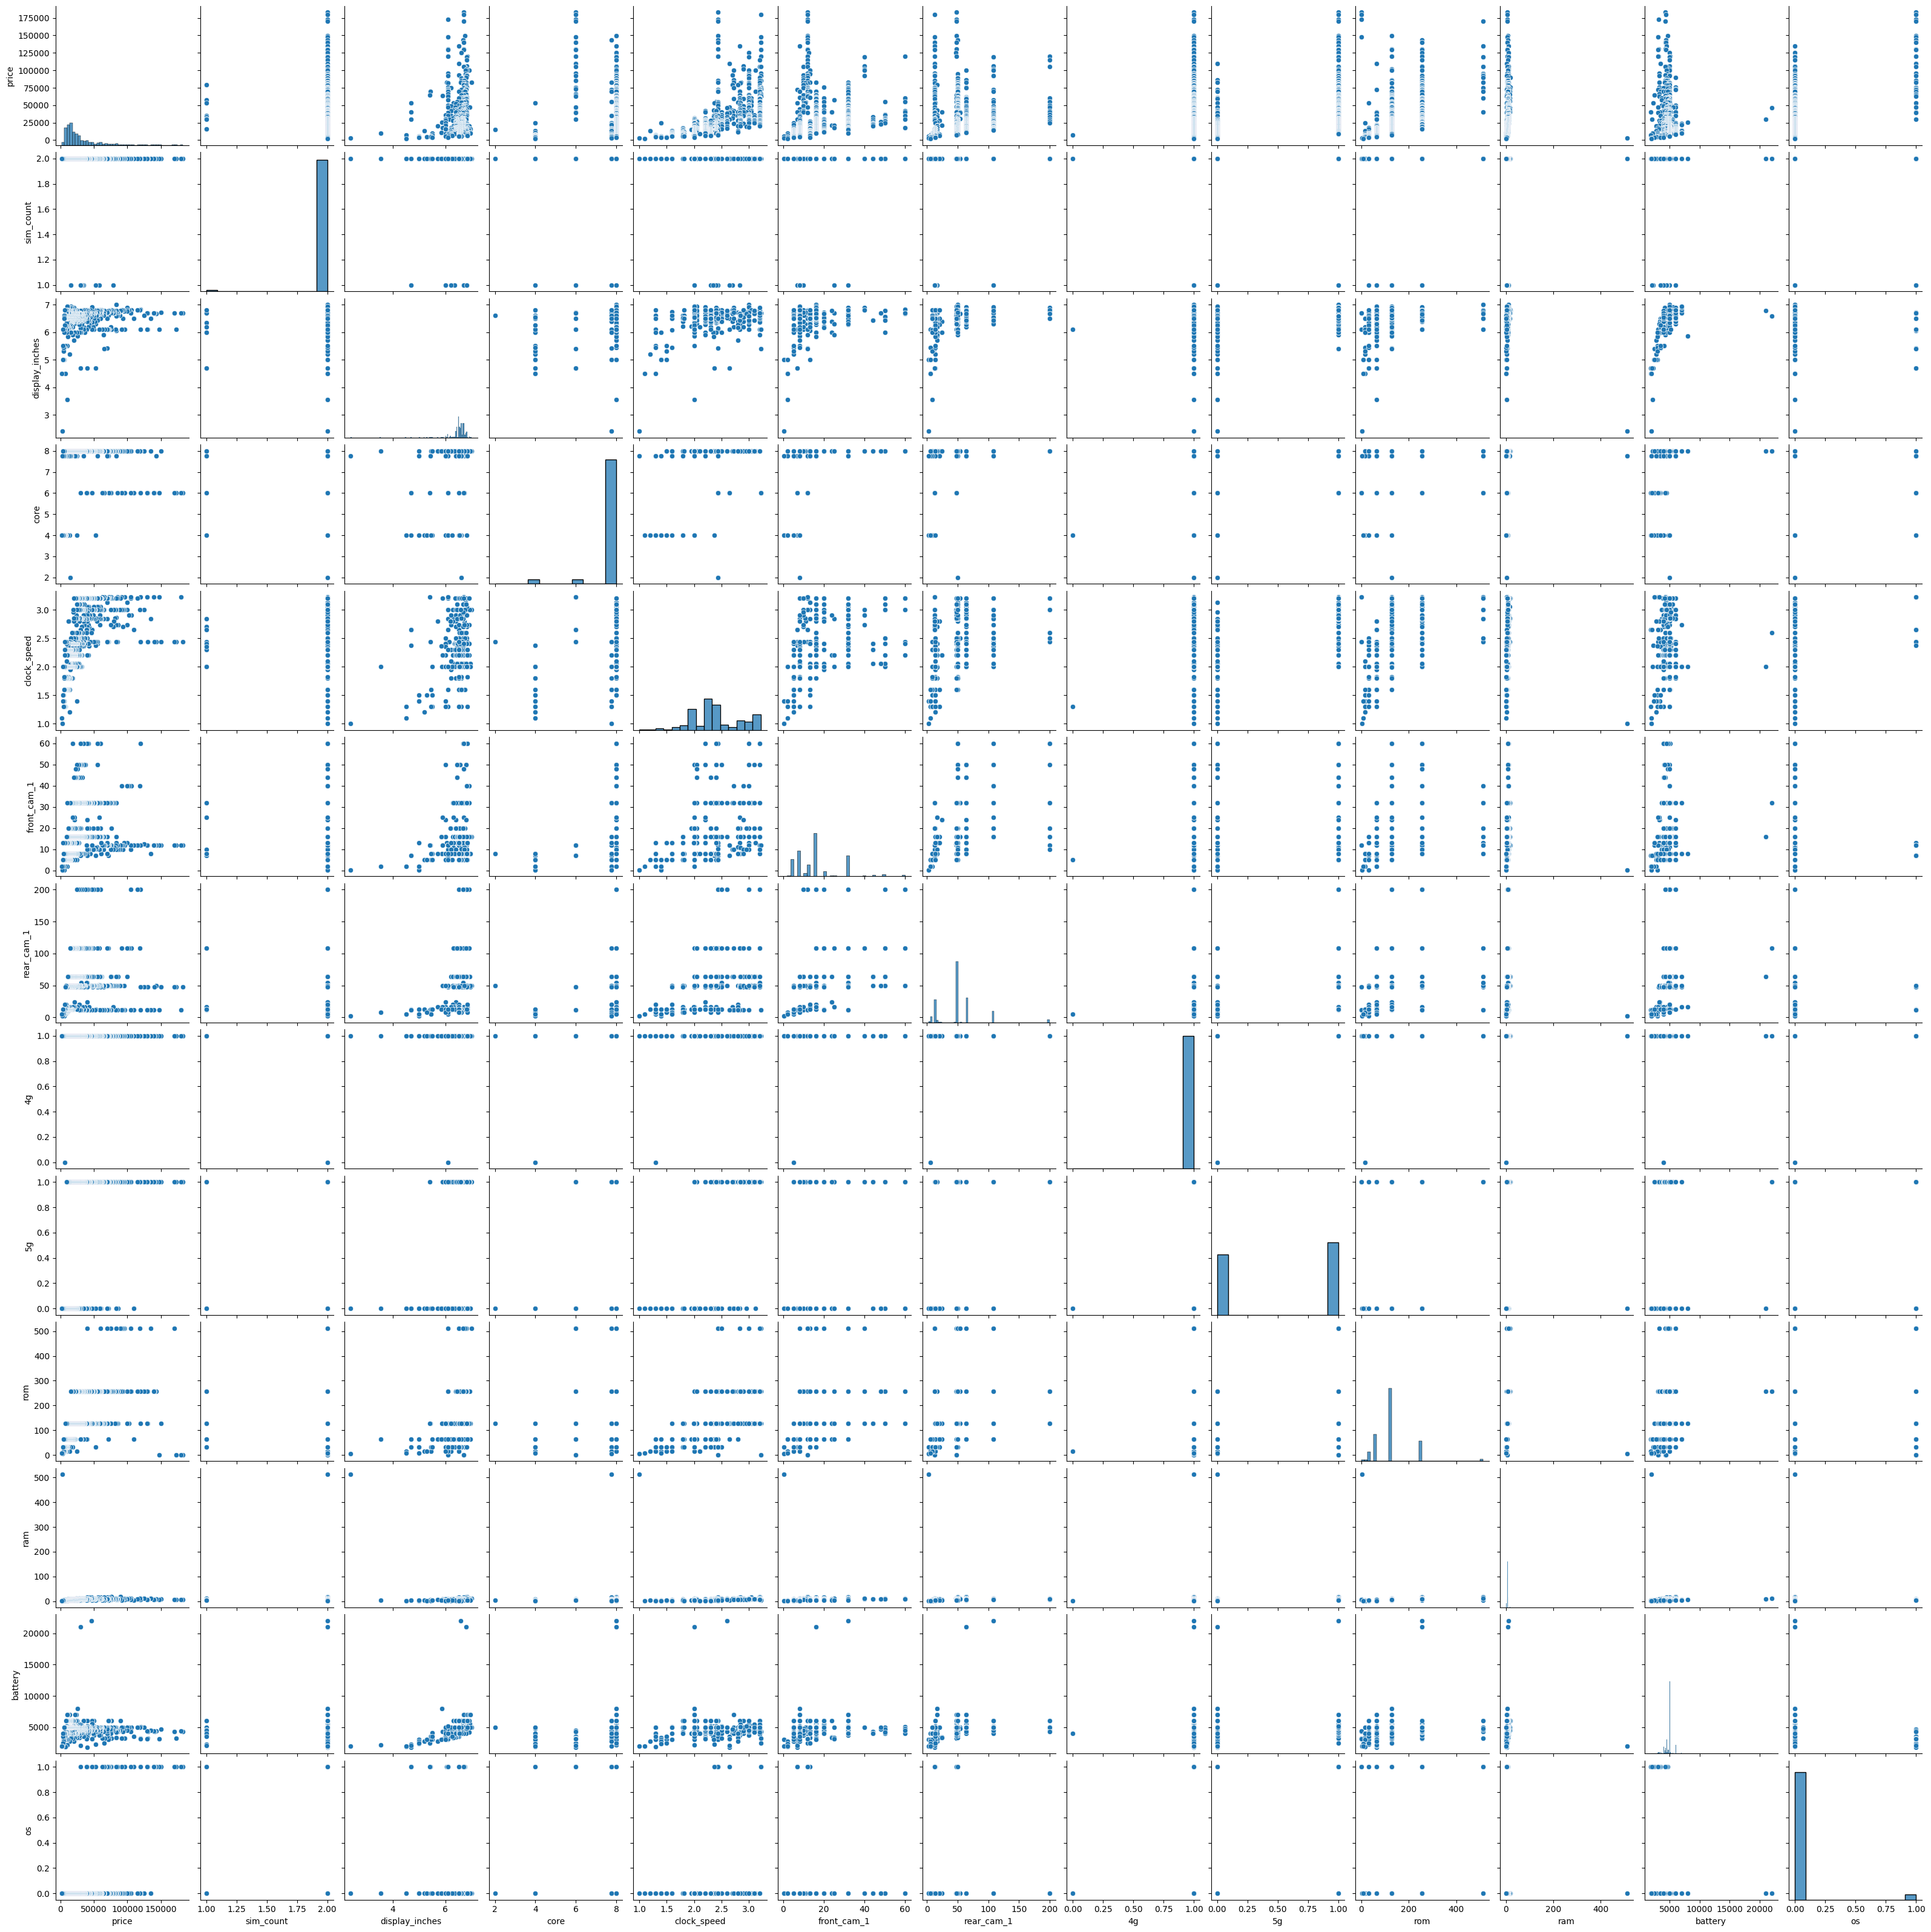

In [15]:
sns.pairplot(data)

## Train Test Split Data

In [16]:
y = data["price"]
data.drop(["price"],axis=1,inplace=True)
x = data

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Model Initialization

In [18]:
lr = LinearRegression().fit(x_train,y_train)
rf = RandomForestRegressor(max_depth=10,n_estimators=100,random_state=1).fit(x_train,y_train)
dt = DecisionTreeRegressor().fit(x_train,y_train)

## Training And Testing

In [19]:
print("Linear Regression\n")
print("score: ", lr.score(x_train,y_train))
lr_pred = lr.predict(x_test)
print("mean squared error: " , mean_squared_error(y_test,lr_pred))
print("mean absolute error: " , mean_absolute_error(y_test,lr_pred))
print("r2 score: " , r2_score(y_test,lr_pred))

Linear Regression

score:  0.7075595288095471
mean squared error:  8146693955.6065235
mean absolute error:  15291.682797361855
r2 score:  -18.711483931876305


In [20]:
print("Random Forest\n")
print("score: ", rf.score(x_train,y_train))
rf_pred = rf.predict(x_test)
print("mean squared error: " , mean_squared_error(y_test,rf_pred))
print("mean absolute error: " , mean_absolute_error(y_test,rf_pred))
print("r2 score: " , r2_score(y_test,rf_pred))

Random Forest

score:  0.9717834070373991
mean squared error:  59412745.423638366
mean absolute error:  4790.961019288925
r2 score:  0.856246793711853


In [21]:
print("Decision Tree\n")
print("score: ", dt.score(x_train,y_train))
dt_pred = dt.predict(x_test)
print("mean squared error: " , mean_squared_error(y_test,dt_pred))
print("mean absolute error: " , mean_absolute_error(y_test,dt_pred))
print("r2 score: " , r2_score(y_test,dt_pred))

Decision Tree

score:  0.9983316686635055
mean squared error:  86248613.65322106
mean absolute error:  5638.635638297872
r2 score:  0.7913155727419857


## Testing With Single Unknown Data

In [23]:
# a = [sim_count,display_inches,core,clock_speed,front_cam_1,rear_cam_1,4g,5g,rom,ram,battery,os]
# original price = 18490
a = [2,6.6,8,2.4,13,50,1,1,128,6,6000,0]
a = np.array(a)
a = np.expand_dims(a, 0)
print(rf.predict(a))
print(lr.predict(a))
print(dt.predict(a))

[18915.98740519]
[24924.92898463]
[18999.]


**From above cell we can see that predictions are almost accurate with unseen data**

## Testing With Cross Validation

In [24]:
new_rf = RandomForestRegressor(max_depth=10,n_estimators=100,random_state=1)
new_dt = DecisionTreeRegressor()
new_lr = LinearRegression()
print("Random Forest",cross_val_score(new_rf,x,y,cv=10,scoring="r2",error_score="raise"))

Random Forest [ -2.77496431  -5.64774174 -21.84718695 -35.502978   -24.89174759
 -28.16772985 -39.50196207 -24.8186178   -9.92049769 -25.42001304]


In [25]:
print("Decision Tree",cross_val_score(new_dt,x,y,cv=10,scoring="r2"))

Decision Tree [ -2.7844794   -9.23641537 -23.30069714 -51.53813743 -29.50368432
 -57.39028333 -63.57475353 -52.17754754 -24.25033219 -40.09093026]


In [26]:
print("Linear Regression",cross_val_score(new_lr,x,y,cv=10,scoring="r2"))

Linear Regression [-2.63379702e+00 -3.08902424e+00 -2.45927291e+01 -6.08706394e+01
 -3.89539703e+01 -8.10885965e+01 -1.39102917e+02 -7.69948556e+01
 -4.14578546e+01 -8.81500445e+03]


## Pickling The Model

In [27]:
pickle.dump(lr,open("linear.p","wb"))
pickle.dump(rf,open("randomforest.p","wb"))
pickle.dump(dt,open("decision.p","wb"))